## Installieren & importieren

In [1]:
pip install seaborn openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt


## Data laden

In [3]:
data_df = pd.read_csv('ftp://129.187.44.58/public/public/HTDataAnalysisPython/data/Case_studies/CPTAC_Endometrial_Carcinoma/data/proteinGroups.txt', sep='\t')

C:\Users\Annaf\AppData\Local\Temp\ipykernel_24096\2361098247.py:1: DtypeWarning: Columns (643,644) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv('ftp://129.187.44.58/public/public/HTDataAnalysisPython/data/Case_studies/CPTAC_Endometrial_Carcinoma/data/proteinGroups.txt', sep='\t')


In [4]:
#data_df = data_df.set_index('Protein IDs')
data = data_df.copy()
data.head()

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,...,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,Taxonomy IDs
0,A0A024RBG1,A0A024RBG1,11,2,2,NaN,NUDT4,sp|A0A024RBG1|NUD4B_HUMAN Diphosphoinositol po...,1,11,...,0,373;58394;62439;110264;114790;114791;147426;17...,False;False;False;False;True;True;False;False;...,399;62739;67075;118378;123220;123221;160283;18...,4916;4917;4918;4919;4920;4921;4922;4923;4924;4...,5620;5621;5622;5623;5624;5625;5626;5627;5628;5...,5639;886923;953424;1686987;1755456;1755466;225...,0,53,-1
1,A0A075B6H9;A0A075B6K6,A0A075B6H9,3;1,2;0,2;0,NaN,IGLV4-69,sp|A0A075B6H9|LV469_HUMAN Immunoglobulin lambd...,2,3,...,1,65168;68849;68850,True;False;True,70043;73970;73971,869176;869177;869178;869179;869180;869181;8691...,996417;996418;996419;996420;996421;996422;9964...,996436;1055341;1055346,NaN,NaN,-1;-1
2,A0A075B6I0,A0A075B6I0,4,4,4,NaN,IGLV8-61,sp|A0A075B6I0|LV861_HUMAN Immunoglobulin lambd...,1,4,...,2,65163;180232;180233;190758,True;True;True;True,70038;195264;195265;206513,869077;869078;869079;869080;869081;869082;8690...,996314;996315;996316;996317;996318;996319;9963...,996334;2708251;2708258;2866834,NaN,NaN,-1
3,A0A075B6I1,A0A075B6I1,2,2,2,NaN,IGLV4-60,sp|A0A075B6I1|LV460_HUMAN Immunoglobulin lambd...,1,2,...,3,65167;78824,True;True,70042;84742,869161;869162;869163;869164;869165;869166;8691...,996401;996402;996403;996404;996405;996406;9964...,996410;1210952,NaN,NaN,-1
4,A0A075B6I4,A0A075B6I4,1,1,1,NaN,IGLV10-54,sp|A0A075B6I4|LVX54_HUMAN Immunoglobulin lambd...,1,1,...,4,139386,True,151716,1876348;1876349;1876350,2145644;2145645;2145646,2145646,NaN,NaN,-1


## Data Spalten auswählen

In [5]:
reporter_channels = [i for i in data.columns if i.startswith('Reporter intensity corrected')]
len(reporter_channels) # es gibt 170 reporter channels

batch_names = list({re.sub(r'^Reporter intensity corrected \d+ ', '', batch) for batch in reporter_channels})
data.columns.to_list()

columns = ['Protein IDs',
           'Majority protein IDs',
           'Protein names',
           'Gene names',
           'Q-value',
           'Score',
           'Reverse', 
           'Potential contaminant',
           ]

columns = columns + reporter_channels
data = data[[x for x in columns if x in data.columns]]
len(data.columns)

178

In [6]:
data.head()

,Protein IDs,Majority protein IDs,Protein names,Gene names,Q-value,Score,Reverse,Potential contaminant,Reporter intensity corrected 1 01CPTAC_UCEC_Proteome_PNNL_20170922_01CPTAC_UCEC_Proteome_PNNL_20170922_raw,Reporter intensity corrected 2 01CPTAC_UCEC_Proteome_PNNL_20170922_01CPTAC_UCEC_Proteome_PNNL_20170922_raw,...,Reporter intensity corrected 1 17CPTAC_UCEC_Proteome_PNNL_20181015_17CPTAC_UCEC_Proteome_PNNL_20181015_raw,Reporter intensity corrected 2 17CPTAC_UCEC_Proteome_PNNL_20181015_17CPTAC_UCEC_Proteome_PNNL_20181015_raw,Reporter intensity corrected 3 17CPTAC_UCEC_Proteome_PNNL_20181015_17CPTAC_UCEC_Proteome_PNNL_20181015_raw,Reporter intensity corrected 4 17CPTAC_UCEC_Proteome_PNNL_20181015_17CPTAC_UCEC_Proteome_PNNL_20181015_raw,Reporter intensity corrected 5 17CPTAC_UCEC_Proteome_PNNL_20181015_17CPTAC_UCEC_Proteome_PNNL_20181015_raw,Reporter intensity corrected 6 17CPTAC_UCEC_Proteome_PNNL_20181015_17CPTAC_UCEC_Proteome_PNNL_20181015_raw,Reporter intensity corrected 7 17CPTAC_UCEC_Proteome_PNNL_20181015_17CPTAC_UCEC_Proteome_PNNL_20181015_raw,Reporter intensity corrected 8 17CPTAC_UCEC_Proteome_PNNL_20181015_17CPTAC_UCEC_Proteome_PNNL_20181015_raw,Reporter intensity corrected 9 17CPTAC_UCEC_Proteome_PNNL_20181015_17CPTAC_UCEC_Proteome_PNNL_20181015_raw,Reporter intensity corrected 10 17CPTAC_UCEC_Proteome_PNNL_20181015_17CPTAC_UCEC_Proteome_PNNL_20181015_raw
0,A0A024RBG1,A0A024RBG1,NaN,NUDT4,0.000093,4.5890,NaN,NaN,0.0,0.0,...,61643.0,62006.0,78448.0,71128.0,74147.0,71708.0,55561.0,78696.0,104990.0,65165.0
1,A0A075B6H9;A0A075B6K6,A0A075B6H9,NaN,IGLV4-69,0.000000,14.4130,NaN,NaN,95301.0,97608.0,...,31352.0,29710.0,80613.0,135250.0,40461.0,52336.0,96208.0,71705.0,83600.0,43615.0
2,A0A075B6I0,A0A075B6I0,NaN,IGLV8-61,0.000000,10.4070,NaN,NaN,176590.0,524190.0,...,3791600.0,3058600.0,1292500.0,5740000.0,9970200.0,5707500.0,13644000.0,5664300.0,10451000.0,13328000.0
3,A0A075B6I1,A0A075B6I1,NaN,IGLV4-60,0.001789,2.3315,NaN,NaN,0.0,0.0,...,583810.0,1124700.0,1335800.0,2406700.0,2213400.0,1371200.0,2476400.0,1697900.0,3302200.0,1858200.0
4,A0A075B6I4,A0A075B6I4,NaN,IGLV10-54,0.002394,2.0634,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Normalisierung und Referenzkanal

In [7]:
def normalize_intensity_by_reference(row, reference_channel, list_of_batches):
    """
    Normalizes intensity values in a dataset based on a reference channel for each batch.
    Intensities are scaled back to their original value range using the median of all reference intensity values.

    Parameters:
        row (pd.Series): The data row containing intensity values.
        reference_channel (str): The name of the reference channel to normalize by.
        list_of_batches (list): List of batch identifiers to process.

    Returns:
        pd.Series: The normalized intensity values for the row.
    """

    # Extract intensity values for the reference channel across all batches
    reference_values = row[row.index.str.startswith(f'Reporter intensity corrected {reference_channel} ')]

    # Remove zero values and calculate the median of the non-zero reference intensities
    non_zero_references = reference_values[reference_values != 0]
    reference_median = non_zero_references.median() if not non_zero_references.empty else 0

    # Create a mask to identify all channels starting with "Reporter intensity corrected"
    reporter_mask = row.index.str.startswith("Reporter intensity corrected ")

    # Initialize a dictionary to store the normalized values
    res_dict = row.to_dict()

    # Iterate through each batch
    for batch in list_of_batches:
        # Extract reference intensity for the current batch
        reference_col = f'Reporter intensity corrected {reference_channel} {batch}'
        reference_intensity = row.get(reference_col, 0)

        # Identify all channels for the current batch
        batch_channels_mask = reporter_mask & row.index.str.endswith(f" {batch}")
        batch_values = row[batch_channels_mask]

        # Normalize batch values using reference intensity, if non-zero
        if reference_intensity != 0:
            normalized_values = (batch_values / reference_intensity) * reference_median
        else:
            normalized_values = pd.Series(0, index=batch_values.index)

        # Update the result dictionary with the normalized values
        res_dict.update(normalized_values.to_dict())

    return pd.Series(res_dict)

In [8]:
data = data.apply(normalize_intensity_by_reference, axis=1, reference_channel=1, list_of_batches=[i for i in range(1,18)])

## filtering & log2

In [9]:
data_norm = data.copy()

In [10]:
# Speichere Ausgangsgrößen
gesamt_anfang = len(data_norm)

# --- 0-Werte mit 1000 ersetzen, um sie von späterem Minimum zu unterscheiden ---
data_norm[reporter_channels] = data_norm[reporter_channels].replace(0, 1000)
print(f"0-Werte temporär mit 1000 ersetzt in {len(reporter_channels)} Intensitätskanälen.")

# --- Referenzspalten, die mit 'Reporter intensity corrected 1 ' beginnen, entfernen ---
ref_cols = data_norm.columns[data_norm.columns.str.startswith('Reporter intensity corrected 1 ')]
if len(ref_cols) > 0:
    data_norm = data_norm.drop(columns=ref_cols)
    print(f"{len(ref_cols)} Referenzspalten entfernt.")
    
    # reporter_channels anpassen, um entfernte Spalten auszuschließen
    reporter_channels = [col for col in reporter_channels if col not in ref_cols]

# --- Imputation: Minimum über Intensitäten finden und NaNs mit 0.8*Minimum ersetzen ---
minimum_value = data_norm[reporter_channels].min().min()
impute_value = minimum_value * 0.8
print(f"Minimum beträgt {minimum_value}")
print(f"Imputation value berechnet als 0.8 * Minimum: {impute_value}")

# 1000er-Werte wieder in NaN zurücksetzen
data_norm[reporter_channels] = data_norm[reporter_channels].replace(1000, np.nan)

# Filter: zu viele fehlende Werte entfernen
zeilen_anzahl_vor = len(data_norm)
max_missing = 0.30  # erlaubt max. 30% NaN pro Protein
data_norm = data_norm[data_norm[reporter_channels].isna().mean(axis=1) < max_missing]
zeilen_anzahl_nach = len(data_norm)
entfernte_zeilen = zeilen_anzahl_vor - zeilen_anzahl_nach
print(f"Es wurden {entfernte_zeilen} Zeilen entfernt, weil zu viele NaNs vorhanden waren.")

# --- Zähle NaNs (vor Imputation) ---
nans_vor_imputation = data_norm[reporter_channels].isna().sum().sum()

# --- Zähle NaNs (vor Imputation) + ausführliche Diagnostics ---
# reporter_channels sollte jetzt die finalen Sample-Spalten enthalten (nach Entfernen der Ref-Spalten)
n_proteins = len(data_norm)
n_channels = len(reporter_channels)
total_possible = n_proteins * n_channels

# Anzahl fehlender Werte insgesamt (vor Imputation)
nans_vor_imputation = data_norm[reporter_channels].isna().sum().sum()

# Wie viele Proteine sind überhaupt betroffen (mindestens 1 NaN)?
proteine_mit_nan = (data_norm[reporter_channels].isna().sum(axis=1) > 0).sum()

# Per-Protein-Statistiken (Anzahl NaNs pro Protein)
nan_counts_per_protein = data_norm[reporter_channels].isna().sum(axis=1)
median_per_protein = nan_counts_per_protein.median()
mean_per_protein = nan_counts_per_protein.mean()
max_per_protein = nan_counts_per_protein.max()

print("=== Imputation diagnostics (BEFORE fillna) ===")
print(f"Proteine (rows)                : {n_proteins}")
print(f"Reporter channels (samples)    : {n_channels}")
print(f"Max mögliche Messwerte         : {total_possible}")
print(f"Fehlende Werte (gesamt)        : {int(nans_vor_imputation):,}")
print(f"Prozent fehlender Werte (gesamt): {nans_vor_imputation/total_possible*100:.2f}%")
print(f"Proteine mit >=1 NaN           : {proteine_mit_nan} ({proteine_mit_nan/n_proteins*100:.2f}%)")
print(f"Median NaNs / Protein          : {int(median_per_protein)}")
print(f"Durchschnitt NaNs / Protein    : {mean_per_protein:.2f}")
print(f"Max NaNs für ein Protein       : {int(max_per_protein)}")
print("==============================================")

# NaNs mit Imputationswert füllen
data_norm[reporter_channels] = data_norm[reporter_channels].fillna(impute_value)

print(f"Insgesamt wurden {nans_vor_imputation:,} fehlende Werte imputed (mit {impute_value:.2f}).")

# --- log2-transformieren ---
data_norm[reporter_channels] = np.log2(data_norm[reporter_channels])

# Entfernen von Zeilen mit Decoys (Reverse = '+')
anzahl_vor = len(data_norm)
data_norm = data_norm.loc[data_norm['Reverse'] != '+'].drop(columns='Reverse')
entfernt = anzahl_vor - len(data_norm)
print(f"Es wurden {entfernt} Zeilen mit Decoy-Proteinen entfernt.")

# Entfernen von Zeilen mit potenziellen Kontaminanten
anzahl_vor = len(data_norm)
data_norm = data_norm.loc[data_norm['Potential contaminant'] != '+'].drop(columns='Potential contaminant')
entfernt = anzahl_vor - len(data_norm)
print(f"Es wurden {entfernt} Zeilen mit potenziellen Kontaminanten entfernt.")

# --- Doppelte Gene: nur bestes Score behalten ---
daten_vor = len(data_norm)
data_norm = data_norm.sort_values('Score', ascending=False)
data_norm = data_norm.drop_duplicates(subset='Gene names', keep='first')
entfernt = daten_vor - len(data_norm)
print(f"Es wurden {entfernt} doppelte Gene entfernt.")

# Gesamtüberblick
gesamt_nach = len(data_norm)
print(f"Ganz am Anfang waren {gesamt_anfang} Zeilen, nach allen Filterschritten verbleiben {gesamt_nach} Proteine.")


0-Werte temporär mit 1000 ersetzt in 170 Intensitätskanälen.
17 Referenzspalten entfernt.
Minimum beträgt 465.96
Imputation value berechnet als 0.8 * Minimum: 372.76800000000003
Es wurden 2807 Zeilen entfernt, weil zu viele NaNs vorhanden waren.
=== Imputation diagnostics (BEFORE fillna) ===
Proteine (rows)                : 9213
Reporter channels (samples)    : 153
Max mögliche Messwerte         : 1409589
Fehlende Werte (gesamt)        : 41,452
Prozent fehlender Werte (gesamt): 2.94%
Proteine mit >=1 NaN           : 1835 (19.92%)
Median NaNs / Protein          : 0
Durchschnitt NaNs / Protein    : 4.50
Max NaNs für ein Protein       : 45
Insgesamt wurden 41,452 fehlende Werte imputed (mit 372.77).
Es wurden 78 Zeilen mit Decoy-Proteinen entfernt.
Es wurden 38 Zeilen mit potenziellen Kontaminanten entfernt.
Es wurden 55 doppelte Gene entfernt.
Ganz am Anfang waren 12020 Zeilen, nach allen Filterschritten verbleiben 9042 Proteine.


## histogram intensities

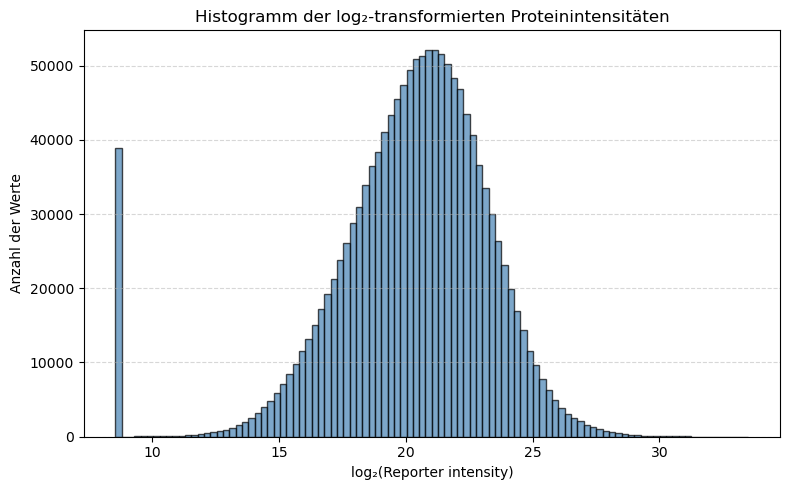

Statistik der log₂-Intensitäten:
Min:  8.54
Max:  33.51
Mittelwert: 20.19
Median: 20.55
Standardabweichung: 3.25


In [11]:
# Alle log2-transformierten Werte aus den Reporter-Kanälen in ein 1D-Array bringen
all_values = data_norm[reporter_channels].values.flatten()

# NaN-Werte entfernen (falls nach Imputation noch vorhanden)
all_values = all_values[~np.isnan(all_values)]

plt.figure(figsize=(8, 5))
plt.hist(all_values, bins=100, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel("log₂(Reporter intensity)")
plt.ylabel("Anzahl der Werte")
plt.title("Histogramm der log₂-transformierten Proteinintensitäten")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Optional: Kurzstatistik ausgeben
print("Statistik der log₂-Intensitäten:")
print(f"Min:  {np.min(all_values):.2f}")
print(f"Max:  {np.max(all_values):.2f}")
print(f"Mittelwert: {np.mean(all_values):.2f}")
print(f"Median: {np.median(all_values):.2f}")
print(f"Standardabweichung: {np.std(all_values):.2f}")

NameError: name 'data1' is not defined

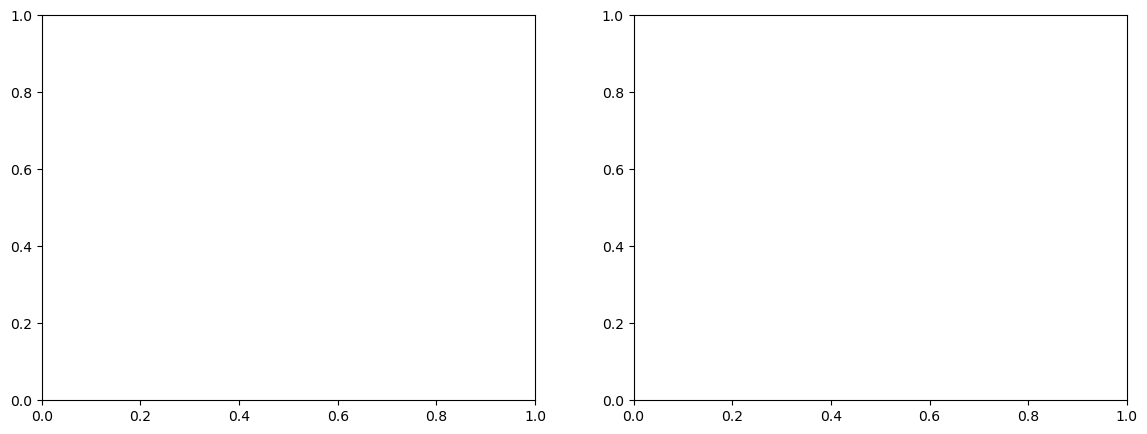

In [12]:
# --- A: Raw Scores ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data1['Score'], ax=axes[0], bins=20, color='lightcoral', edgecolor='black')
axes[0].set_title('Histogram of raw data scores')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Panel label
axes[0].text(-0.1, 1.05, 'A', transform=axes[0].transAxes,
             fontsize=16, fontweight='bold', va='top', ha='left')

# --- B: Log2-transformed intensities ---
all_values = data_norm[reporter_channels].values.flatten()
all_values = all_values[~np.isnan(all_values)]

axes[1].hist(all_values, bins=100, color='steelblue', edgecolor='black', alpha=0.7)
axes[1].set_title('Filtered & log₂-transformed protein intensities')
axes[1].set_xlabel('log₂(Reporter intensity)')
axes[1].set_ylabel('Count')
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Panel label
axes[1].text(-0.1, 1.05, 'B', transform=axes[1].transAxes,
             fontsize=16, fontweight='bold', va='top', ha='left')

plt.tight_layout()
plt.show()

## Umbenennung der Intensity Spalten zu Patientinnen IDs (sample mapping)

In [ ]:
# 1) Annotation einlesen
# ------------------------------------------
annotation_df = pd.read_excel(
    'ftp://129.187.44.58/public/public/HTDataAnalysisPython/data/Case_studies/CPTAC_Endometrial_Carcinoma/metadata/S053_S043_CPTAC_UCEC_Discovery_Cohort_Study_Specimens_r2_Feb2020.xlsx',
    comment='#',
    header=None
)


c:\Users\Annaf\anaconda3\envs\wipro_env\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
annot = annotation_df.copy()

# Header identifizieren und setzen
header_row = annot[annot.iloc[:,0] == 'TMT plex'].index[0]
annot.columns = annot.iloc[header_row]
annot = annot.drop(range(header_row+1))
annot = annot.dropna(axis=1, how='all')  # leere Spalten raus
annot = annot.reset_index(drop=True)

# Erste Zeile entfernen, falls sie nur wieder die Spaltennamen enthält
if annot.iloc[0, 0] == "TMT plex":
    annot = annot.drop(0).reset_index(drop=True)

# Kontrolle
print(annot.shape)

# Nur relevante Spalten behalten
meta_cols = ['TMT plex', 'TMT channel', 'ParticipantID (Case_ID)', 'Group']
meta_df = annot[meta_cols].dropna(subset=['TMT plex', 'TMT channel'])

(174, 11)


In [ ]:
# Einheitliche Formate
meta_df['TMT plex'] = meta_df['TMT plex'].astype(str).str.strip().str.zfill(2)
meta_df['TMT channel'] = meta_df['TMT channel'].astype(str).str.strip()

# === Mapping von Kanal-Label → numerischem Index ===
channel_to_idx = {
    '126': 1, '127N': 2, '127C': 3, '128N': 4, '128C': 5,
    '129N': 6, '129C': 7, '130N': 8, '130C': 9, '131': 10
}

meta_df['channel_idx'] = meta_df['TMT channel'].map(channel_to_idx)

# === 🔑 batch_ID im Format "<channel_idx>-<plex>" ===
meta_df['batch_ID'] = meta_df.apply(lambda r: f"{r['channel_idx']}-{r['TMT plex']}", axis=1)

# Dictionaries für Mapping
case_id_dict = dict(zip(meta_df['batch_ID'], meta_df['ParticipantID (Case_ID)']))
group_dict = dict(zip(meta_df['batch_ID'], meta_df['Group']))

print(f"✅ {len(case_id_dict)} batch_ID mappings erstellt (Beispiel: {list(case_id_dict.items())[:3]})")

# === 2️⃣ Reporter intensity-Spalten finden ===
intensity_cols = [c for c in data.columns if c.startswith('Reporter intensity corrected')]

meta_info = []
for col in intensity_cols:
    # Regex: "Reporter intensity corrected <channel> <plex>CPTAC..."
    m = re.search(r'Reporter intensity corrected (\d+)\s+(\d{2})CPTAC', col)
    if not m:
        continue
    channel_idx, plex = m.groups()
    batch_ID = f"{int(channel_idx)}-{plex.zfill(2)}"  # z. B. "1-01", "10-17"
    meta_info.append({'col_name': col, 'batch_ID': batch_ID})

meta_info = pd.DataFrame(meta_info)

# === 3️⃣ Mapping anwenden ===
meta_info['ParticipantID'] = meta_info['batch_ID'].map(case_id_dict)
meta_info['Group'] = meta_info['batch_ID'].map(group_dict)
meta_info['new_col_name'] = (
    meta_info['ParticipantID'].fillna('Unknown') + '_' +
    meta_info['Group'].fillna('Unknown')
)

# === 4️⃣ Umbenennung der Spalten ===
rename_dict = dict(zip(meta_info['col_name'], meta_info['new_col_name']))
sample_cols = [c for c in data.columns if c in rename_dict and c in data_norm.columns]

# alle Spalten behalten, nur Sample-Spalten umbenennen
data_selected = data_norm.copy()
data_selected.rename(columns=rename_dict, inplace=True)

# === 5️⃣ Lookup-Tabelle ===
meta_lookup = (
    meta_info[['new_col_name', 'Group', 'ParticipantID']]
    .drop_duplicates('new_col_name')
    .set_index('new_col_name')
)

print("✅ Mapping abgeschlossen.")
display(meta_info.head())
display(data_selected.head())

✅ 170 batch_ID mappings erstellt (Beispiel: [('1-01', 'Ref'), ('2-01', 'C3N-00858'), ('3-01', 'C3N-00858')])
✅ Mapping abgeschlossen.


,col_name,batch_ID,ParticipantID,Group,new_col_name
0,Reporter intensity corrected 1 01CPTAC_UCEC_Pr...,1-01,Ref,NaN,Ref_Unknown
1,Reporter intensity corrected 2 01CPTAC_UCEC_Pr...,2-01,C3N-00858,Tumor,C3N-00858_Tumor
2,Reporter intensity corrected 3 01CPTAC_UCEC_Pr...,3-01,C3N-00858,Normal,C3N-00858_Normal
3,Reporter intensity corrected 4 01CPTAC_UCEC_Pr...,4-01,C3L-01252,Normal,C3L-01252_Normal
4,Reporter intensity corrected 5 01CPTAC_UCEC_Pr...,5-01,C3L-01252,Tumor,C3L-01252_Tumor


,Protein IDs,Majority protein IDs,Protein names,Gene names,Q-value,Score,C3N-00858_Tumor,C3N-00858_Normal,C3L-01252_Normal,C3L-01252_Tumor,...,Withdrawn (C3N-01825R)_Withdrawn,NX12_Normal,NX17_Normal,NX13_Normal,NX14_Normal,NX10_Normal,NX16_Normal,NX18_Normal,NX11_Normal,NX15_Normal
2634,P22033,P22033,"Methylmalonyl-CoA mutase, mitochondrial",MUT,0.0,323.31,23.434917,21.143515,21.595642,21.919326,...,22.213267,22.671870,23.210758,22.583068,23.557190,22.805382,22.790067,23.023370,23.192889,23.196525
6455,Q7L7V1,Q7L7V1,Putative pre-mRNA-splicing factor ATP-dependen...,DHX32,0.0,323.31,20.615220,18.586187,19.060284,19.548491,...,19.956739,19.926539,20.396864,19.578450,20.246903,19.166634,19.813171,19.985236,20.144200,20.006211
3344,P48382,P48382,DNA-binding protein RFX5,RFX5,0.0,323.31,19.922451,18.858631,19.580972,19.834252,...,21.012499,19.313804,19.340498,19.411585,20.098670,19.476311,19.531400,19.957590,19.994657,19.651707
10790,Q9UBQ5,Q9UBQ5,Eukaryotic translation initiation factor 3 sub...,EIF3K,0.0,323.31,21.233449,19.612793,19.863236,20.728415,...,21.821431,22.814818,23.145522,23.180468,24.078712,22.938315,23.191112,23.486894,23.503852,23.409375
6476,Q7RTP6,Q7RTP6,Protein-methionine sulfoxide oxidase MICAL3,MICAL3,0.0,323.31,21.547079,20.429922,21.060258,21.162509,...,22.625044,22.013113,22.025332,22.594435,22.440073,22.100082,22.392730,22.291287,22.836226,22.391315


In [ ]:
# 1️⃣ Alle Withdrawn-Spalten finden
withdrawn_cols = [c for c in data_selected.columns if "Withdrawn" in c]

# 2️⃣ Anzahl und Namen ausgeben
print(f"Es gibt {len(withdrawn_cols)} Withdrawn-Spalten:")
for col in withdrawn_cols:
    print(f" - {col}")

# 3️⃣ Spalten entfernen
data_selected = data_selected.drop(columns=withdrawn_cols)
print("✅ Withdrawn-Spalten entfernt.")

data_selected.head()

Es gibt 4 Withdrawn-Spalten:
 - Withdrawn (C3N-01001)_Withdrawn
 - Withdrawn (C3L-00084)_Withdrawn
 - Withdrawn (C3L-01284)_Withdrawn
 - Withdrawn (C3N-01825R)_Withdrawn
✅ Withdrawn-Spalten entfernt.


,Protein IDs,Majority protein IDs,Protein names,Gene names,Q-value,Score,C3N-00858_Tumor,C3N-00858_Normal,C3L-01252_Normal,C3L-01252_Tumor,...,C3N-00847_Tumor,NX12_Normal,NX17_Normal,NX13_Normal,NX14_Normal,NX10_Normal,NX16_Normal,NX18_Normal,NX11_Normal,NX15_Normal
2634,P22033,P22033,"Methylmalonyl-CoA mutase, mitochondrial",MUT,0.0,323.31,23.434917,21.143515,21.595642,21.919326,...,24.297541,22.671870,23.210758,22.583068,23.557190,22.805382,22.790067,23.023370,23.192889,23.196525
6455,Q7L7V1,Q7L7V1,Putative pre-mRNA-splicing factor ATP-dependen...,DHX32,0.0,323.31,20.615220,18.586187,19.060284,19.548491,...,21.648033,19.926539,20.396864,19.578450,20.246903,19.166634,19.813171,19.985236,20.144200,20.006211
3344,P48382,P48382,DNA-binding protein RFX5,RFX5,0.0,323.31,19.922451,18.858631,19.580972,19.834252,...,21.509783,19.313804,19.340498,19.411585,20.098670,19.476311,19.531400,19.957590,19.994657,19.651707
10790,Q9UBQ5,Q9UBQ5,Eukaryotic translation initiation factor 3 sub...,EIF3K,0.0,323.31,21.233449,19.612793,19.863236,20.728415,...,22.700854,22.814818,23.145522,23.180468,24.078712,22.938315,23.191112,23.486894,23.503852,23.409375
6476,Q7RTP6,Q7RTP6,Protein-methionine sulfoxide oxidase MICAL3,MICAL3,0.0,323.31,21.547079,20.429922,21.060258,21.162509,...,22.629253,22.013113,22.025332,22.594435,22.440073,22.100082,22.392730,22.291287,22.836226,22.391315


## Explodieren lassen
Gene / Sample indexed machen

In [ ]:
# 1️⃣ Gene names splitten
data_selected['Gene names'] = data_selected['Gene names'].str.split(';')
print(f"Vor dem Exploden: {len(data_selected)} Zeilen")
# 2️⃣ Explodieren (jede Gene name bekommt eine eigene Zeile)
data_exploded = data_selected.explode('Gene names')

# 3️⃣ Leere Gene names entfernen
data_exploded = data_exploded[data_exploded['Gene names'] != '']

# 4️⃣ Duplikate anhand Gene names entfernen (nur erste Zeile behalten)
data_exploded = data_exploded.drop_duplicates(subset='Gene names', keep='first')

# Ergebnis prüfen
display(data_exploded.head())
print(f"✅ Anzahl Zeilen nach Explode: {len(data_exploded)}")

Vor dem Exploden: 9042 Zeilen


,Protein IDs,Majority protein IDs,Protein names,Gene names,Q-value,Score,C3N-00858_Tumor,C3N-00858_Normal,C3L-01252_Normal,C3L-01252_Tumor,...,C3N-00847_Tumor,NX12_Normal,NX17_Normal,NX13_Normal,NX14_Normal,NX10_Normal,NX16_Normal,NX18_Normal,NX11_Normal,NX15_Normal
2634,P22033,P22033,"Methylmalonyl-CoA mutase, mitochondrial",MUT,0.0,323.31,23.434917,21.143515,21.595642,21.919326,...,24.297541,22.671870,23.210758,22.583068,23.557190,22.805382,22.790067,23.023370,23.192889,23.196525
6455,Q7L7V1,Q7L7V1,Putative pre-mRNA-splicing factor ATP-dependen...,DHX32,0.0,323.31,20.615220,18.586187,19.060284,19.548491,...,21.648033,19.926539,20.396864,19.578450,20.246903,19.166634,19.813171,19.985236,20.144200,20.006211
3344,P48382,P48382,DNA-binding protein RFX5,RFX5,0.0,323.31,19.922451,18.858631,19.580972,19.834252,...,21.509783,19.313804,19.340498,19.411585,20.098670,19.476311,19.531400,19.957590,19.994657,19.651707
10790,Q9UBQ5,Q9UBQ5,Eukaryotic translation initiation factor 3 sub...,EIF3K,0.0,323.31,21.233449,19.612793,19.863236,20.728415,...,22.700854,22.814818,23.145522,23.180468,24.078712,22.938315,23.191112,23.486894,23.503852,23.409375
6476,Q7RTP6,Q7RTP6,Protein-methionine sulfoxide oxidase MICAL3,MICAL3,0.0,323.31,21.547079,20.429922,21.060258,21.162509,...,22.629253,22.013113,22.025332,22.594435,22.440073,22.100082,22.392730,22.291287,22.836226,22.391315


✅ Anzahl Zeilen nach Explode: 9120


## Reformatierung

In [ ]:
# --- 1️⃣ Gene names als Index setzen ---
data_exploded.set_index('Gene names', inplace=True)

# --- 2️⃣ Sample-Spalten extrahieren, nur die, die noch im DataFrame existieren ---
existing_samples = [c for c in meta_info['new_col_name'] if c in data_exploded.columns]
genes = data_exploded[existing_samples]

# --- 3️⃣ Transponieren, damit Samples Zeilen werden ---
samples = genes.transpose()

# --- 4️⃣ Metadaten für Merge vorbereiten ---
meta_merge = meta_info[['new_col_name', 'ParticipantID', 'Group', 'batch_ID']].copy()

# Entferne alle Withdrawn-Spalten, die vorher schon rausgenommen wurden
meta_merge = meta_merge[meta_merge['new_col_name'].isin(existing_samples)]

# Extrahiere TMT plex & TMT channel aus batch_ID
meta_merge['TMT channel'] = meta_merge['batch_ID'].str.split('-').str[0]
meta_merge['TMT plex'] = meta_merge['batch_ID'].str.split('-').str[1]

# setze Index für Merge
meta_merge = meta_merge.set_index('new_col_name')

# --- 5️⃣ Merge Samples mit Metadaten ---
samples = samples.merge(meta_merge, left_index=True, right_index=True, how='left')

# 🔹 5b. Leerzeichen in der Spalte 'Group' entfernen
samples['Group'] = samples['Group'].str.strip()

# --- 6️⃣ Index resetten und Spalten umsortieren ---
samples.reset_index(inplace=True)
samples.rename(columns={'index': 'Patient_ID'}, inplace=True)
cols_order = ['Patient_ID', 'ParticipantID', 'TMT plex', 'TMT channel', 'Group'] + \
             [c for c in samples.columns if c not in ['Patient_ID','ParticipantID','TMT plex','TMT channel','Group']]
samples = samples[cols_order]

# --- 7️⃣ Ergebnis prüfen ---
display(samples)
print(f"✅ Ergebnis: {samples.shape[0]} Samples, {samples.shape[1]-5} Gene-Spalten")



,Patient_ID,ParticipantID,TMT plex,TMT channel,Group,MUT,DHX32,RFX5,EIF3K,MICAL3,...,ATP2B3,SERPINA2,CYP7A1,AKAP4,FRMPD3,HIST3H2BB,DNAH10,CDADC1,DNAH7,batch_ID
0,C3N-00858_Tumor,C3N-00858,01,2,Tumor,23.434917,20.615220,19.922451,21.233449,21.547079,...,20.989469,18.095891,15.506277,8.542134,16.320695,20.675471,15.014718,15.015067,17.612595,2-01
1,C3N-00858_Normal,C3N-00858,01,3,Normal,21.143515,18.586187,18.858631,19.612793,20.429922,...,18.016232,18.399203,16.585417,8.542134,15.276015,19.402704,16.609929,13.694031,15.170668,3-01
2,C3L-01252_Normal,C3L-01252,01,4,Normal,21.595642,19.060284,19.580972,19.863236,21.060258,...,18.459560,18.075458,16.691389,8.542134,16.336001,20.058541,16.706442,15.136390,17.166045,4-01
3,C3L-01252_Tumor,C3L-01252,01,5,Tumor,21.919326,19.548491,19.834252,20.728415,21.162509,...,20.377083,21.261094,16.120420,8.542134,17.044202,20.584445,15.008604,16.834545,19.597362,5-01
4,C3L-00947_Tumor,C3L-00947,01,6,Tumor,22.783627,20.246787,20.174994,21.312797,21.619391,...,21.017673,18.361233,15.662780,8.542134,16.617697,19.919995,14.932953,15.894249,18.082336,6-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,NX10_Normal,NX10,17,6,Normal,22.805382,19.166634,19.476311,22.938315,22.100082,...,18.052664,19.881828,19.598434,15.851871,8.542134,20.880169,16.322368,8.542134,20.652635,6-17
145,NX16_Normal,NX16,17,7,Normal,22.790067,19.813171,19.531400,23.191112,22.392730,...,18.160443,20.519222,19.927118,15.711317,8.542134,21.010452,16.850504,8.542134,20.863176,7-17
146,NX18_Normal,NX18,17,8,Normal,23.023370,19.985236,19.957590,23.486894,22.291287,...,19.106742,19.631245,19.900492,16.412289,8.542134,20.656743,18.286088,8.542134,20.336036,8-17
147,NX11_Normal,NX11,17,9,Normal,23.192889,20.144200,19.994657,23.503852,22.836226,...,19.652512,19.406944,20.081998,16.318172,8.542134,21.229640,17.564581,8.542134,21.018488,9-17


✅ Ergebnis: 149 Samples, 9121 Gene-Spalten


In [ ]:
#speichern
# Sample-indexed
samples.to_csv("proteomics_without_metadata1.csv", index=True)
print(f"Sample-indexed Daten gespeichert: {samples.shape[0]} Samples, {samples.shape[1]} Gene")

Sample-indexed Daten gespeichert: 149 Samples, 9126 Gene


## Klinische Metadaten

In [ ]:
# 5) Klinische Metadaten hinzufügen
# ------------------------------------------
clinical_metadata = pd.read_excel(
    r"C:\Users\Annaf\Desktop\CPTAC_Endometrial_Carcinoma\metadata\S053_S043_CPTAC_UCEC_Discovery_Cohort_Clinical_Data_r2_Feb2020.xlsx",
    sheet_name="Patient_Clinical_Attributes"
)

clinical_cols = [
    'case_id',
    'case_excluded',
    'age',
    #'gender', #kann raus weil es sind eh nur Frauen
    'BMI',
    'tumor_stage_pathological',
    'tobacco_smoking_history',
    'diabetes',
    'histologic_type',
    'histologic_grade',
    'microsatellite_instability',
    'tumor_size_in_cm',
    'number_of_full_term_pregnancies',
    'pathologic_staging_primary_tumor_pT'
]

c:\Users\Annaf\anaconda3\envs\wipro_env\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
clinical = clinical_metadata[clinical_cols].rename(columns={'case_id': 'ParticipantID (Case_ID)'})
clinical['ParticipantID (Case_ID)'] = clinical['ParticipantID (Case_ID)'].astype(str)

# --- 2️⃣ Excluded Cases entfernen ---
clinical = clinical.loc[clinical['case_excluded'].astype(str).str.lower() != 'yes']

# --- 3️⃣ Samples vorbereiten für Merge ---
# Extrahiere PatientID ohne Tumor/Normal suffix
samples['ParticipantID (Case_ID)'] = samples['Patient_ID'].str.split('_').str[0]

# --- 4️⃣ Merge klinische Daten ---
samples_annotated = samples.merge(
    clinical.drop(columns='case_excluded'),  # 'case_excluded' brauchen wir nicht mehr
    on='ParticipantID (Case_ID)',
    how='left'
)

# --- 5️⃣ Optional: Metadaten-Columns vorne sortieren ---
meta_cols = ['Patient_ID', 'ParticipantID (Case_ID)', 'Group', 'age', #'gender', 
             'BMI', 'tumor_stage_pathological', 'tobacco_smoking_history', 'diabetes',
             'histologic_type', 'histologic_grade', 'microsatellite_instability', 'tumor_size_in_cm',
             'number_of_full_term_pregnancies','pathologic_staging_primary_tumor_pT'
]

other_cols = [c for c in samples_annotated.columns if c not in meta_cols]

samples_annotated = samples_annotated[meta_cols + other_cols]

print(f"✅ Samples mit klinischen Metadaten gemerged: {samples_annotated.shape[0]} Zeilen, {samples_annotated.shape[1]} Spalten")

✅ Samples mit klinischen Metadaten gemerged: 149 Zeilen, 9138 Spalten


In [ ]:
samples_annotated.head()

,Patient_ID,ParticipantID (Case_ID),Group,age,BMI,tumor_stage_pathological,tobacco_smoking_history,diabetes,histologic_type,histologic_grade,...,ATP2B3,SERPINA2,CYP7A1,AKAP4,FRMPD3,HIST3H2BB,DNAH10,CDADC1,DNAH7,batch_ID
0,C3N-00858_Tumor,C3N-00858,Tumor,65,36.00,Stage III,Lifelong non-smoker: Less than 100 cigarettes ...,No,Endometrioid carcinoma,G2 Moderately differentiated,...,20.989469,18.095891,15.506277,8.542134,16.320695,20.675471,15.014718,15.015067,17.612595,2-01
1,C3N-00858_Normal,C3N-00858,Normal,65,36.00,Stage III,Lifelong non-smoker: Less than 100 cigarettes ...,No,Endometrioid carcinoma,G2 Moderately differentiated,...,18.016232,18.399203,16.585417,8.542134,15.276015,19.402704,16.609929,13.694031,15.170668,3-01
2,C3L-01252_Normal,C3L-01252,Normal,76,38.41,Stage I,Lifelong non-smoker: Less than 100 cigarettes ...,Yes,Endometrioid carcinoma,G1 Well differentiated,...,18.459560,18.075458,16.691389,8.542134,16.336001,20.058541,16.706442,15.136390,17.166045,4-01
3,C3L-01252_Tumor,C3L-01252,Tumor,76,38.41,Stage I,Lifelong non-smoker: Less than 100 cigarettes ...,Yes,Endometrioid carcinoma,G1 Well differentiated,...,20.377083,21.261094,16.120420,8.542134,17.044202,20.584445,15.008604,16.834545,19.597362,5-01
4,C3L-00947_Tumor,C3L-00947,Tumor,71,36.84,Stage I,Lifelong non-smoker: Less than 100 cigarettes ...,Yes,Endometrioid carcinoma,G2 Moderately differentiated,...,21.017673,18.361233,15.662780,8.542134,16.617697,19.919995,14.932953,15.894249,18.082336,6-01


entfernen von 5 tumor samples die nicht in metadaten drin sind

In [ ]:
# --- 1️⃣ Index und Spaltennamen bereinigen ---
samples_annotated.columns = samples_annotated.columns.str.strip()
# --- 1️⃣ Index und Spaltennamen bereinigen ---
samples_annotated.columns = samples_annotated.columns.str.strip()

# Nur strip anwenden, wenn der Index Strings enthält
if samples_annotated.index.dtype == "object":
    samples_annotated.index = samples_annotated.index.str.strip()


# =====================================
# 2️⃣ Tissue Type erstellen
# =====================================
# Kombinierte Variable aus Group (Normal/Tumor) und histologic_type
samples_annotated['tissue_type'] = np.where(
    samples_annotated['Group'].str.lower().eq('normal'),
    'Normal',
    samples_annotated['histologic_type']
)

# Fehlende Werte kennzeichnen
samples_annotated['tissue_type'] = (
    samples_annotated['tissue_type']
    .replace({np.nan: 'Unknown'})
    .astype(str)
)

# Übersicht ausgeben
print("📊 tissue_type counts BEFORE filtering:")
print(samples_annotated['tissue_type'].value_counts(dropna=False))

# =====================================
# 3️⃣ Unknown-Samples identifizieren
# =====================================
unknown_samples = samples_annotated[samples_annotated['tissue_type'] == 'Unknown'][[
    'Patient_ID', 'Group', 'histologic_type', 'tumor_stage_pathological'
]]

print(f"\n🔍 Found {len(unknown_samples)} Unknown tumor samples:")
display(unknown_samples)

# =====================================
# 4️⃣ Unknown-Samples entfernen
# =====================================
samples_annotated = samples_annotated[samples_annotated['tissue_type'] != 'Unknown'].copy()

print(f"\n✅ Removed {len(unknown_samples)} Unknown samples.")
print("📊 tissue_type counts AFTER filtering:")
print(samples_annotated['tissue_type'].value_counts())



📊 tissue_type counts BEFORE filtering:
tissue_type
Endometrioid carcinoma    83
Normal                    49
Serous carcinoma          12
Unknown                    5
Name: count, dtype: int64

🔍 Found 5 Unknown tumor samples:


,Patient_ID,Group,histologic_type,tumor_stage_pathological
82,C3L-01247_Tumor,Tumor,NaN,NaN
88,C3L-01253_Tumor,Tumor,NaN,NaN
93,C3L-00356_Tumor,Tumor,NaN,NaN
112,C3L-00157_Tumor,Tumor,NaN,NaN
128,C3L-00938_Tumor,Tumor,NaN,NaN



✅ Removed 5 Unknown samples.
📊 tissue_type counts AFTER filtering:
tissue_type
Endometrioid carcinoma    83
Normal                    49
Serous carcinoma          12
Name: count, dtype: int64


In [ ]:
samples_annotated

,Patient_ID,ParticipantID (Case_ID),Group,age,BMI,tumor_stage_pathological,tobacco_smoking_history,diabetes,histologic_type,histologic_grade,...,SERPINA2,CYP7A1,AKAP4,FRMPD3,HIST3H2BB,DNAH10,CDADC1,DNAH7,batch_ID,tissue_type
0,C3N-00858_Tumor,C3N-00858,Tumor,65,36.00,Stage III,Lifelong non-smoker: Less than 100 cigarettes ...,No,Endometrioid carcinoma,G2 Moderately differentiated,...,18.095891,15.506277,8.542134,16.320695,20.675471,15.014718,15.015067,17.612595,2-01,Endometrioid carcinoma
1,C3N-00858_Normal,C3N-00858,Normal,65,36.00,Stage III,Lifelong non-smoker: Less than 100 cigarettes ...,No,Endometrioid carcinoma,G2 Moderately differentiated,...,18.399203,16.585417,8.542134,15.276015,19.402704,16.609929,13.694031,15.170668,3-01,Normal
2,C3L-01252_Normal,C3L-01252,Normal,76,38.41,Stage I,Lifelong non-smoker: Less than 100 cigarettes ...,Yes,Endometrioid carcinoma,G1 Well differentiated,...,18.075458,16.691389,8.542134,16.336001,20.058541,16.706442,15.136390,17.166045,4-01,Normal
3,C3L-01252_Tumor,C3L-01252,Tumor,76,38.41,Stage I,Lifelong non-smoker: Less than 100 cigarettes ...,Yes,Endometrioid carcinoma,G1 Well differentiated,...,21.261094,16.120420,8.542134,17.044202,20.584445,15.008604,16.834545,19.597362,5-01,Endometrioid carcinoma
4,C3L-00947_Tumor,C3L-00947,Tumor,71,36.84,Stage I,Lifelong non-smoker: Less than 100 cigarettes ...,Yes,Endometrioid carcinoma,G2 Moderately differentiated,...,18.361233,15.662780,8.542134,16.617697,19.919995,14.932953,15.894249,18.082336,6-01,Endometrioid carcinoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,NX10_Normal,NX10,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.881828,19.598434,15.851871,8.542134,20.880169,16.322368,8.542134,20.652635,6-17,Normal
145,NX16_Normal,NX16,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.519222,19.927118,15.711317,8.542134,21.010452,16.850504,8.542134,20.863176,7-17,Normal
146,NX18_Normal,NX18,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.631245,19.900492,16.412289,8.542134,20.656743,18.286088,8.542134,20.336036,8-17,Normal
147,NX11_Normal,NX11,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.406944,20.081998,16.318172,8.542134,21.229640,17.564581,8.542134,21.018488,9-17,Normal


## Speichern für processing notebook

In [ ]:
# Als CSV speichern
samples_annotated.to_csv("proteomics_with_metadata1.csv", index=False)

print(f"✅ 'samples_annotated' erfolgreich gespeichert.")


✅ 'samples_annotated' erfolgreich gespeichert.
